##Import all the libraries that we need in our project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#Uploading Dataset/ files to use from local machine or Google drive.
you will need to load your dataset in your run time to train the model. the data can be large or small and can need loading accordingly.

#Uploading files from a local machine
YOu can upload or download files directly from your local machine into colab runtime using these helper functions.

In [ ]:
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

#Uploading files from drive.
you can mount your drive and directly use files from your drive's storage for further analysis.
You will want to run the below cell to mount your google drive into the cloud VM so that you can access its contents. It is that easy!

**NOTE:** We will be creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

This means we are just creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'.

The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening!


In [2]:
from google.colab import drive
drive.mount('/content/drive')
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/mydrive


#Load dataset
You will now want to create variables of data as test and train dataset.

In [3]:
train=pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')
train_label=pd.read_csv('/content/drive/MyDrive/Dataset/train_label.csv',names=['Total_booking'])
test_label=pd.read_csv('/content/drive/MyDrive/Dataset/test_label.csv',names=['Total_booking'])

##Overview of the data (size, head...)

In [4]:
print(train.shape)
print(test.shape)
print(train_label.shape)
print(test_label.shape)

(8708, 9)
(2178, 9)
(8708, 1)
(2178, 1)


#Creating a profile of training dataset.
Pandas provides a library call Pandas Profilling which makes it easier to analyse our data. By creating a pandas profile report on your dataset you can get insights such as distinct values in each columns, number of zeros, no. of missings values. You can also check corelation of all the columns with each other. 
 

In [6]:
!pip install pandas-profiling[notebook,html]
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title='Report0')
profile.to_file('your_report.html')

TypeError: ignored

#Handling Null Values
Let's check for null values in our dataset and replace those null values as required.

In [5]:
if (train.isnull().sum().any()!=0):
  print('We have null values in training dataset.')
elif (train_label.isnull().sum().any()!=0):
  print('We have null values in training data for total booking.')
elif (test.isnull().sum().any()!=0):
  print('We have null values in testing dataset.')
elif (test_label.isnull().sum().any()!=0):
  print('We have null values in testing data for total booking.')
else:
  print('No null values we are good to proceed.')

No null values we are good to proceed.


###Datatime column 
For a better analysis on the data we seperate the datetime column to get an understanding of total bookings according to different days, months and years.


In [6]:
train['years']=pd.to_datetime(train['datetime']).dt.year
train['months']=pd.to_datetime(train['datetime']).dt.month_name()
train['days']=pd.to_datetime(train['datetime']).dt.day_name()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,years,months,days
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012,May,Wednesday
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012,September,Wednesday
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011,January,Thursday
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011,November,Friday
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011,September,Tuesday


Let's seperate the timings of our data into two categories.
1. The columns with time after 12 PM is labelled as after_noon 

2. The columns with time before 12PM is labelled as before_noon.




In [7]:
new=[]
for n in range(len(train['datetime'])):
  if 0<pd.to_datetime(train['datetime'][n]).hour<12:
    new.append('before_noon')
  else:
    new.append('after_noon')
train['hour']=new
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,years,months,days,hour
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012,May,Wednesday,after_noon
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012,September,Wednesday,before_noon
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011,January,Thursday,before_noon
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011,November,Friday,after_noon
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011,September,Tuesday,after_noon


Let's follow the same steps on the test dataset.

In [8]:
test['years']=pd.to_datetime(test['datetime']).dt.year
test['months']=pd.to_datetime(test['datetime']).dt.month_name()
test['days']=pd.to_datetime(test['datetime']).dt.day_name()
new=[]
for n in range(len(test['datetime'])):
  if 0<pd.to_datetime(test['datetime'][n]).hour<12:
    new.append('before_noon')
  else:
    new.append('after_noon')
test['hour']=new


Let's add labels to our dataset for data visualization of target values with labels.



In [9]:
train['Total_booking']=train_label
test['Total_booking']=test_label

# **Data Visualization**
We are going to vizualize our data to find insights from each columns.

### Let's visualize the effect of weather on working day.
The data is varied on four types of weather 

1. Clear + Few clouds
2. Light Snow, Light Rain,
3. Mist + Cloudy,
4. Heavy Rain + Thunderstorm 

* The bars in the barplot below are in the same order for every subplot.



Text(0.5, 0, ' Clear + Few clouds, Light Snow, Light Rain, Mist + Cloudy, Heavy Rain + Thunderstorm ')

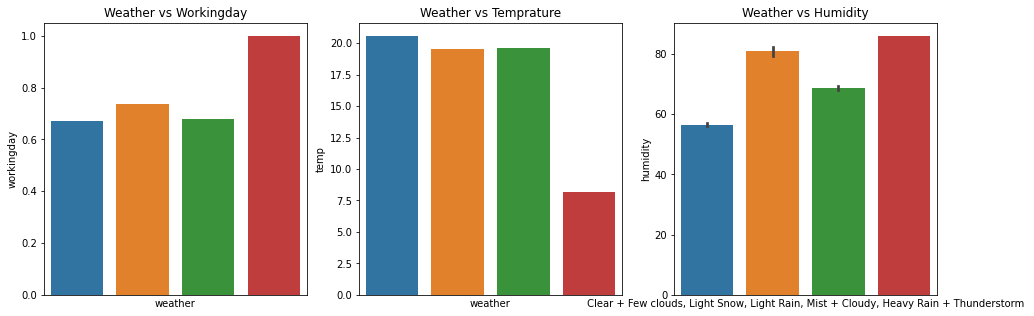

In [10]:
fig, axes = plt.subplots(1, 3, sharex='col', figsize=(16,5),squeeze=True)
labels=' Clear + Few clouds, Light Snow, Light Rain, Mist + Cloudy, Heavy Rain + Thunderstorm '
# plt.text(0.5, 0.5, 'Clear+Few clouds, Light Snow,Light Rain, Mist+Cloudy, Heavy Rain+Thunderstorm' , horizontalalignment='center')


sns.barplot(ax=axes[0],x=train['weather'],y=train['workingday'],ci=None)
axes[0].set_title('Weather vs Workingday')
# plt.text(0.5, 0.5, 'Clear+Few clouds, Light Snow,Light Rain, Mist+Cloudy, Heavy Rain+Thunderstorm' , horizontalalignment='center')

sns.barplot(ax=axes[1],x=train['weather'], y=train['temp'],ci=None)
axes[1].set_title('Weather vs Temprature')

sns.barplot(ax=axes[2],x=train['weather'],y=train['humidity'])
axes[2].set_title('Weather vs Humidity')

plt.setp(plt.gcf().get_axes(), xticks=[])
plt.xlabel(labels)



We can see that
* ***Heavy rains and thunderstorms*** has most humidity and least temprature resulting in most cab bookings.

* During ***Light rains or Light snow*** the humidity is more and the temprature is more resulting in more cab bookings.

*We can infer that extreme or uncomfortable weather conditions often result in good business for the cab bookings.*


In [13]:
data = train.groupby('holiday')['days'].value_counts()
data[0].plot.pie(autopct="%.1f%%")

**This shows that Mondays don't experience much cab bookings relative to weekends (saturday,sunday).**

In [14]:
data1 = train.groupby('season')['Total_booking'].sum()
data1.plot.pie(autopct="%.1f%%", explode=[0.1]*4, pctdistance=0.5)

* Large amount of bookings can be experienced in the Fall and Summer seasons.
* Least amount of bookings are experienced in Spring season.

In [15]:
sns.barplot(x=train['Total_booking'],y=train['days'],ci=None,hue=train['hour'])

* This shows people mostly book a cab after noon. 
* Most bookings are done on saturdays after noon
* Least bookings are experienced on sundays before noon.

*The cab booking will make most profit on weekends after noon and on days approaching weekend before noon.*

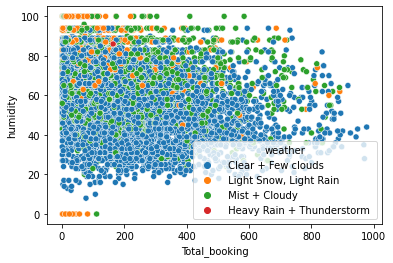

In [14]:
sns.scatterplot(x=train['Total_booking'],y=train['humidity'],ci=None,hue=train['weather'])


Most number of bookings are made during either clear or cloudy weather with moderate humidity or on days with misty or cloudy weather with high humidity.
 
***Humidity plays a part in the surge in cab bookings***


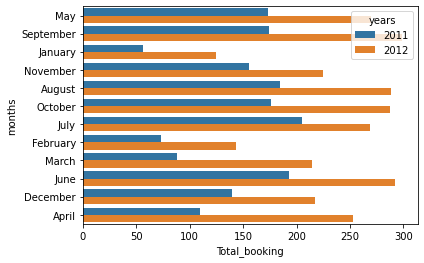

In [15]:
sns.barplot(x=train['Total_booking'],y=train['months'],ci=None,hue=train['years'])

This shows that there has been more than 250 bookings in 2012 rather than in 2011 and the most months with 250+ bookings are May, April,June,July, August,September and October.

*** We can say that weather, Time of the day, Year and humidity or temprature play an important role in the increase of total bookings for the cab service.***

###2. Outlier analysis
We will plot a boxplot to observe the outliers in our data and clean the outliers for training as well as testing dat to avoid any kind of extreme variance in our data.

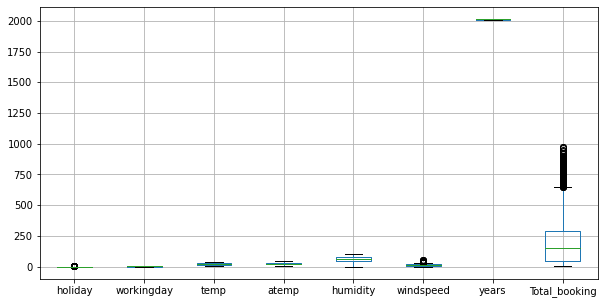

In [15]:
train.boxplot(figsize=(10,5))
plt.show()

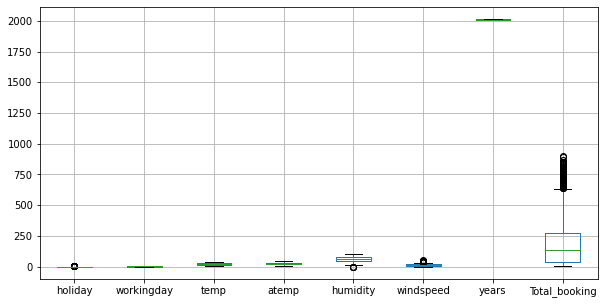

In [16]:
test.boxplot(figsize=(10,5))
plt.show()

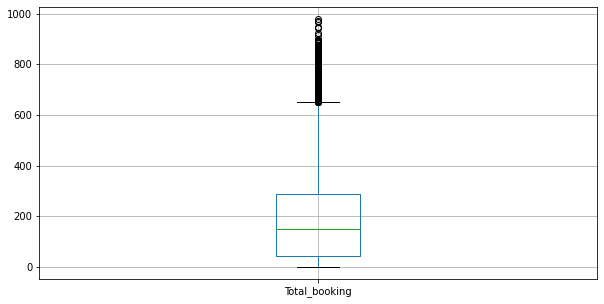

In [18]:
train_label.boxplot(figsize=(10,5))
plt.show()

We can observe there are a lot of outliers in out total booking and windspeed data. So, we will clip the data above the third quantile to avoid huge variation in the data and increase statistical significance.  

In [11]:
q1=train['windspeed'].quantile(.25)
q3=train['windspeed'].quantile(.75)
iqr=q3-q1
train['windspeed']=np.clip(train['windspeed'],q1-1.5*iqr,q3+1.5*iqr)



In [12]:
q1=train['Total_booking'].quantile(.25)
q3=train['Total_booking'].quantile(.75)
iqr=q3-q1
train['Total_booking']=np.clip(train['Total_booking'],q1-1.5*iqr,q3+1.5*iqr)

In [13]:
q1=test['windspeed'].quantile(.25)
q3=test['windspeed'].quantile(.75)
iqr=q3-q1
test['windspeed']=np.clip(test['windspeed'],q1-1.5*iqr,q3+1.5*iqr)

In [14]:
q1=test['Total_booking'].quantile(.25)
q3=test['Total_booking'].quantile(.75)
iqr=q3-q1
test['Total_booking']=np.clip(test['Total_booking'],q1-1.5*iqr,q3+1.5*iqr)

In [15]:
q1=test['humidity'].quantile(.25)
q3=test['humidity'].quantile(.75)
iqr=q3-q1
test['humidity']=np.clip(test['humidity'],q1-1.5*iqr,q3+1.5*iqr)

In [16]:
q1=train_label['Total_booking'].quantile(.25)
q3=train_label['Total_booking'].quantile(.75)
iqr=q3-q1
train_label['Total_booking']=np.clip(train_label['Total_booking'],q1-1.5*iqr,q3+1.5*iqr)

In [17]:
q1=test_label['Total_booking'].quantile(.25)
q3=test_label['Total_booking'].quantile(.75)
iqr=q3-q1
test_label['Total_booking']=np.clip(test_label['Total_booking'],q1-1.5*iqr,q3+1.5*iqr)

### Convert categorical columns into encoded features
Machine learning algorithms and deep learning neural networks require that input and output variables are numbers.

This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model.

We encode using get_dummies as it would give equal weightage to the categorical variables.

The test data does not contain values for one weather type and hence creates imbalance so to avoid that let's encode it using label encoder.
 

In [18]:
train = pd.get_dummies(train,columns=['season', 'years', 'months', 'days', 'hour'])
test = pd.get_dummies(test,columns=['season', 'years', 'months', 'days', 'hour'])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['weather']=le.fit_transform(train['weather'])
test['weather']=le.fit_transform(test['weather'])
train.shape

(8708, 36)

### Correlation--mutlicollinearity (collinearity amongst features)--helps to drop features--amongst features and label--helps drop features not having correlation with labels

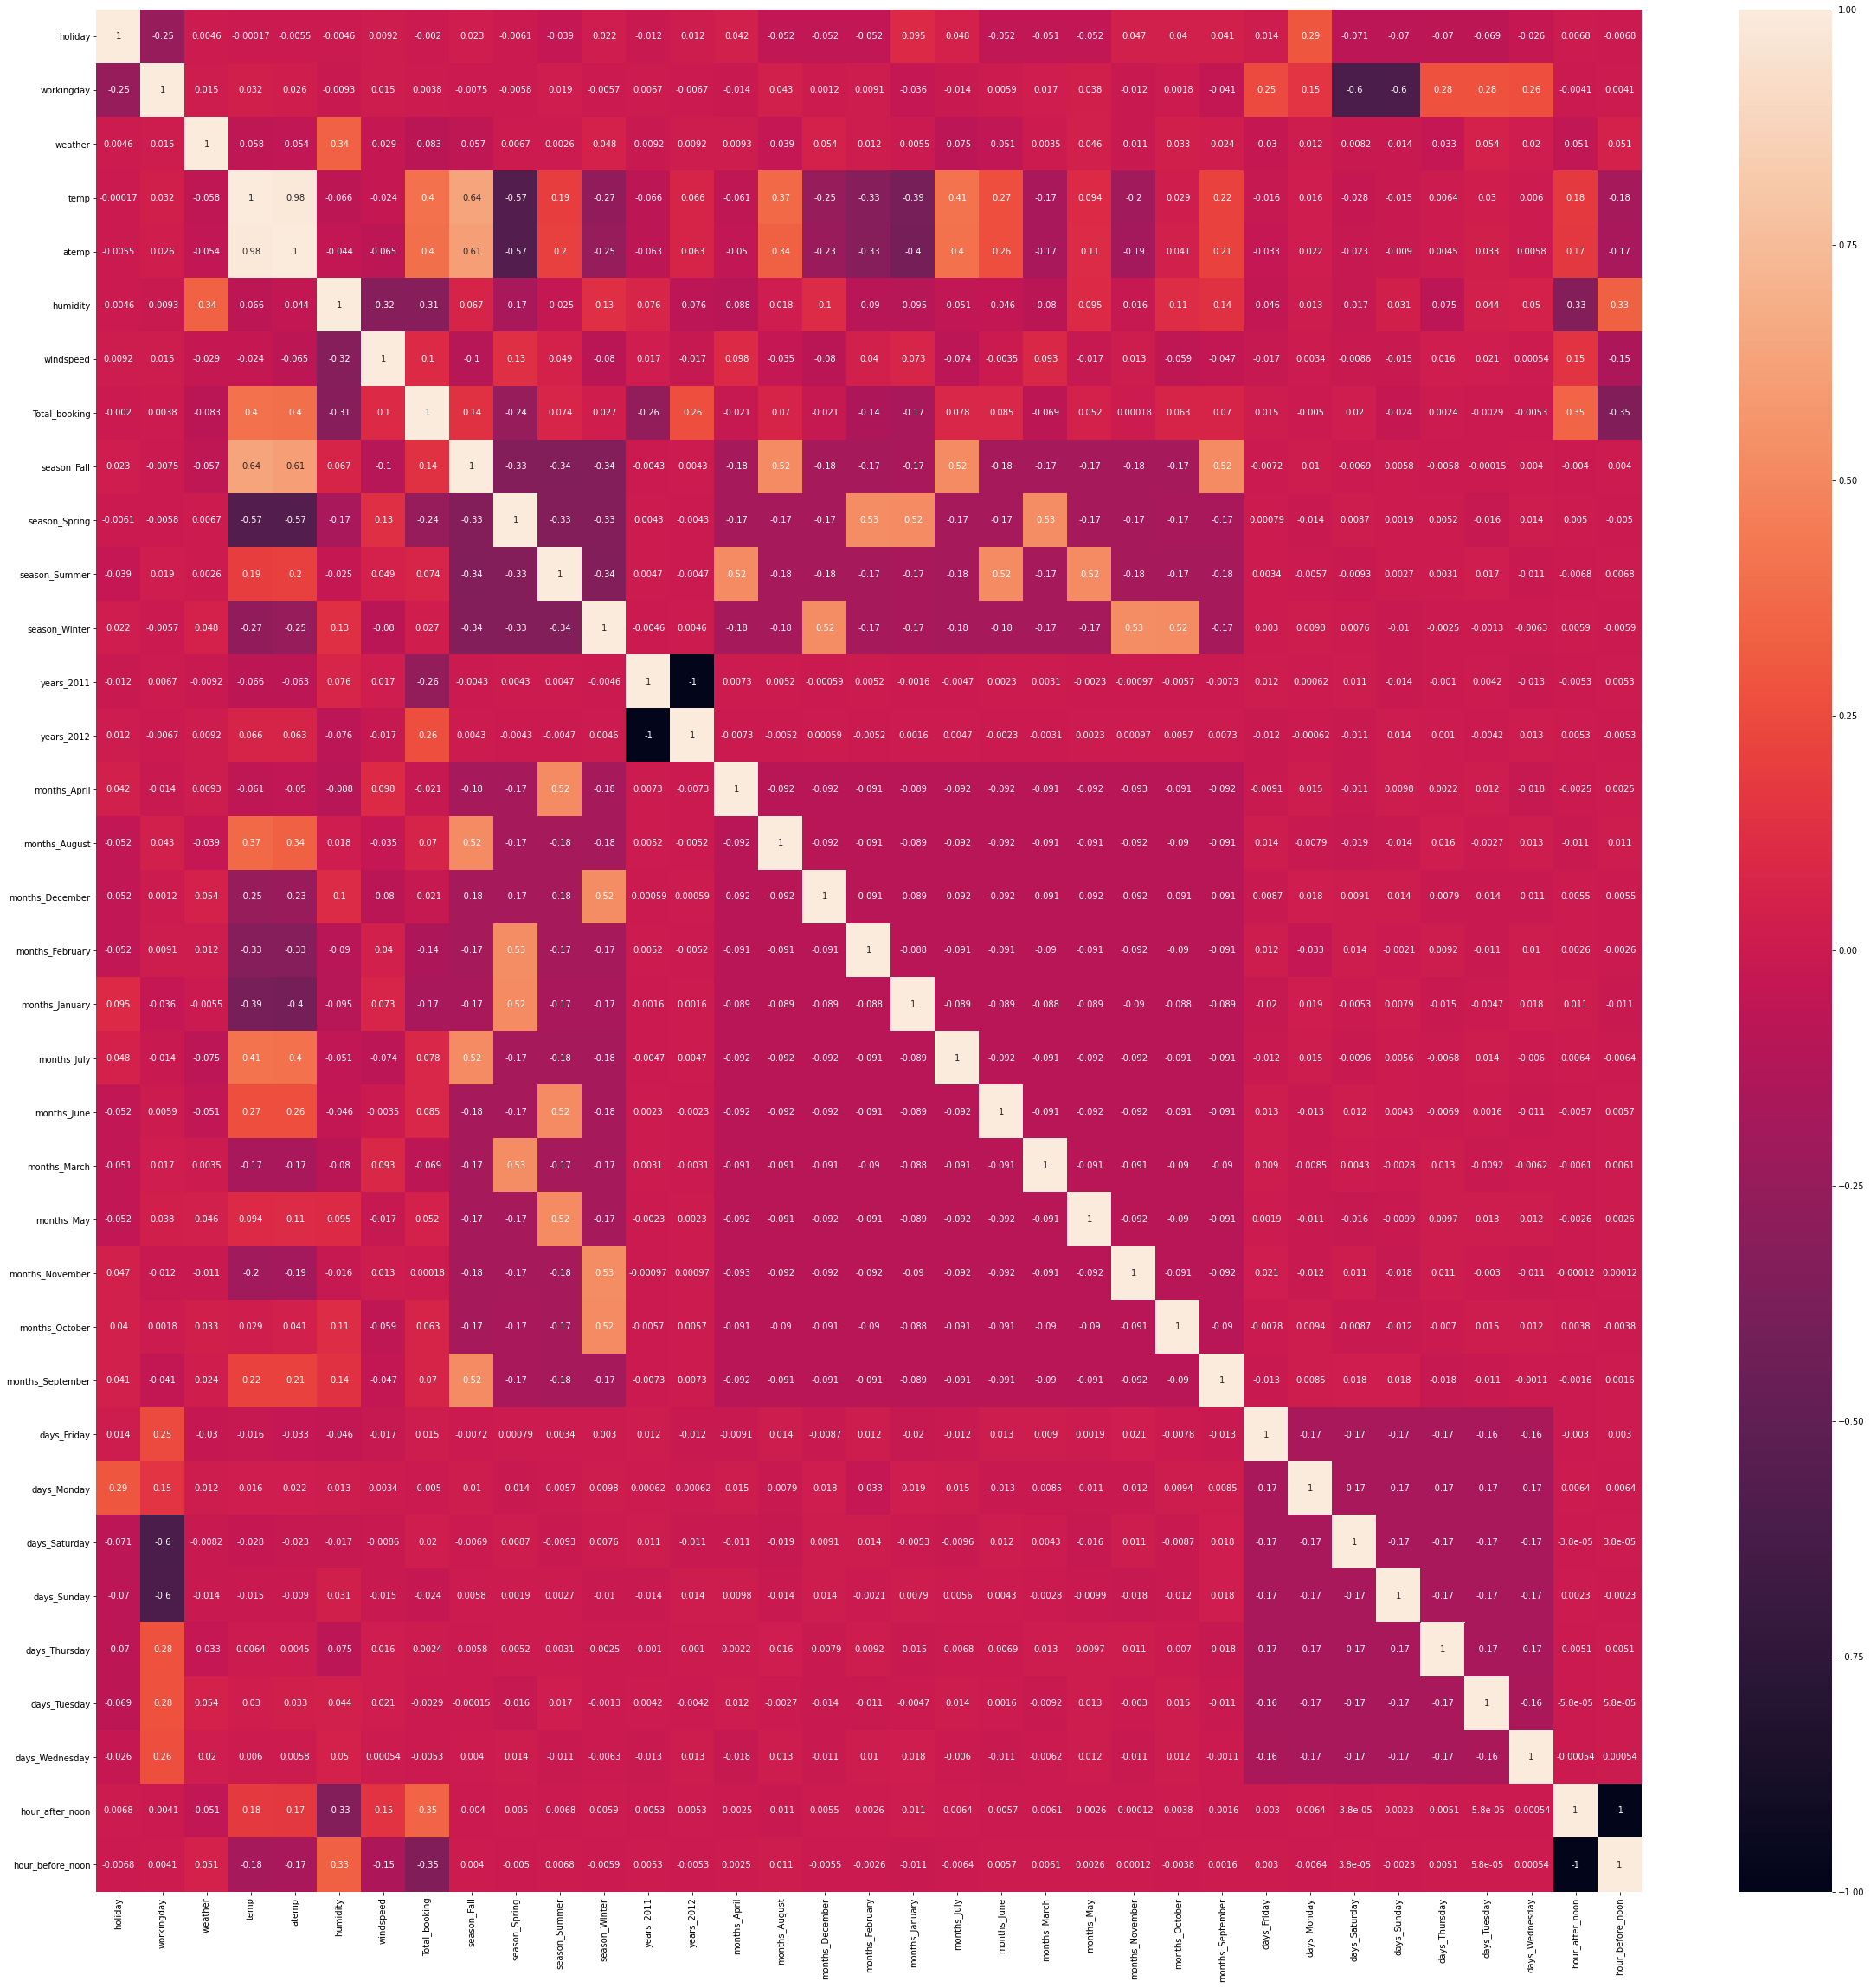

In [19]:
# train['Total_booking']=train_label
fig,ax=plt.subplots(figsize=(40,40))
correlation = train.corr()
sns.heatmap(correlation,xticklabels=True,yticklabels=True,ax=ax,annot=True)

Let's drop some unneccesary columns.
Here we are dropping some columns which had only two categorical values and after encoding we will keep only of the columns.

In [20]:
train=train.drop(columns=['datetime','atemp','hour_before_noon','years_2011'])

In [21]:
test=test.drop(columns=['datetime','atemp','hour_before_noon','years_2011'])

Let's split our training and testing data into targets and labels to fit some models.

In [22]:
x_train=train.drop(columns='Total_booking')
x_test=test.drop(columns='Total_booking')
y_train=train['Total_booking']
y_test=test['Total_booking']


In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train['temp']=x_train['temp'].astype('int64')
x_train['windspeed']=x_train['windspeed'].astype('int64')

(8708, 31)
(2178, 31)
(8708,)
(2178,)


##1. Standardization
Let's scale our data using standard scaler as our target and label data show variance in their numerical values.
The reason why standardization is very much needed before performing PCA is that PCA is very sensitive to variances.

In [24]:
from sklearn.preprocessing import StandardScaler 
scalerx = StandardScaler().fit(x_train)
scalery = StandardScaler().fit(train_label)
train_norm=scalerx.transform(x_train)
y_train_norm=scalery.transform(train_label)
test_norm = scalerx.transform(x_test)
y_test_norm = scalery.transform(test_label)

##Let's import necessary modules for various machine learning algorithms we want to fit our data to.

In [32]:
#machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
#machine learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

##Multiclass Variable
While training a model all the target variables should be of the same class. 


Let's make our binary class variables to multiclass.



In [36]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(x_train))
x_train=x_train.astype('int')
print(utils.multiclass.type_of_target(x_train.astype('int')))
print(utils.multiclass.type_of_target(x_train))
y_train=y_train.astype('int')
print(utils.multiclass.type_of_target(y_train))
y_test=y_test.astype('int')
print(utils.multiclass.type_of_target(y_test))
y_train_norm=y_train_norm.astype('int')
print(utils.multiclass.type_of_target(y_train_norm))
y_test_norm=y_test_norm.astype('int')
print(utils.multiclass.type_of_target(y_test_norm))

multiclass-multioutput
multiclass-multioutput
multiclass-multioutput
multiclass
multiclass
multiclass
multiclass


###Let's start fitting our data into different ML algorithms and evaluate each algo based on different metrics such as accuracy, precision, F1 score and recall. 

#Linear Regression

In [31]:
lr=LinearRegression()
lr.fit(train_norm,y_train_norm)
y_pred_lr=lr.predict(test_norm)
y_pred_lr=y_pred_lr.astype('int')
print('R2_SCORE:',r2_score(y_test_norm,y_pred_lr))
print('MAE', mean_absolute_error(y_test_norm,y_pred_lr))

R2_SCORE: -0.0032529888727905742
MAE 0.38292011019283745


#Logistic Regression

In [32]:
classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier.fit(train_norm,y_train_norm)
y_pred = classifier.predict(test_norm)

acc = accuracy_score(y_test_norm, y_pred)
prec = precision_score(y_test_norm, y_pred,average='weighted')
rec = recall_score(y_test_norm, y_pred,average='weighted')
f1 = f1_score(y_test_norm, y_pred, average='weighted')

results = pd.DataFrame([['Logistic Regression', acc,prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score'])
print(results)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression   0.67539   0.643132  0.67539  0.553129


#Decision Tree


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14) 
# training the classifier
clf.fit(train_norm, y_train_norm)
# do our predictions on the test
pred_dt = clf.predict(test_norm)
# Predicting Test Set
acc = accuracy_score(y_test_norm, pred_dt)
prec = precision_score(y_test_norm, pred_dt, pos_label='positive',average='weighted')
rec = recall_score(y_test_norm, pred_dt, pos_label='positive',average='weighted')
f1 = f1_score(y_test_norm, pred_dt, pos_label='positive', average='weighted')

model_results = pd.DataFrame([['Decision Tree(scaled)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                   Model  Accuracy  Precision    Recall  F1 Score
0    Logistic Regression  0.675390   0.643132  0.675390  0.553129
1  Decision Tree(scaled)  0.608356   0.625815  0.608356  0.616098


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


#Random Forest Classifier


In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(train_norm, y_train_norm)

# Predicting Test Set
y_pred_rf = clf_rf.predict(test_norm)
acc = accuracy_score(y_test_norm, y_pred_rf)
prec = precision_score(y_test_norm, y_pred_rf, pos_label='positive',average='weighted')
rec = recall_score(y_test_norm, y_pred_rf, pos_label='positive',average='weighted')
f1 = f1_score(y_test_norm, y_pred_rf, pos_label='positive', average='weighted')

model_results = pd.DataFrame([['Random Forest(Gini)(scaled)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


                         Model  Accuracy  Precision    Recall  F1 Score
0          Logistic Regression  0.675390   0.643132  0.675390  0.553129
1        Decision Tree(scaled)  0.608356   0.625815  0.608356  0.616098
2  Random Forest(Gini)(scaled)  0.696051   0.665411  0.696051  0.671209


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


#Ada Boost with RFC

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf = RandomForestClassifier()
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(train_norm, y_train_norm)

#Predict the response for test dataset
pred_dt = model.predict(test_norm)
acc = accuracy_score(y_test_norm, pred_dt)
prec = precision_score(y_test_norm, pred_dt, pos_label='positive',average='micro')
rec = recall_score(y_test_norm, pred_dt, pos_label='positive',average='micro')
f1 = f1_score(y_test_norm, pred_dt, pos_label='positive', average='micro')

model_results = pd.DataFrame([['Ada Boost(scaled)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                         Model  Accuracy  Precision    Recall  F1 Score
0          Logistic Regression  0.675390   0.643132  0.675390  0.553129
1        Decision Tree(scaled)  0.608356   0.625815  0.608356  0.616098
2  Random Forest(Gini)(scaled)  0.696051   0.665411  0.696051  0.671209
3            Ada Boost(scaled)  0.692378   0.692378  0.692378  0.692378


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


#Grid Search CV

In [36]:
from sklearn.metrics import make_scorer
params = {'n_estimators':range(20,100,20),'max_depth':range(3,15),'max_features':range(4,17)}
scorer = make_scorer(f1_score, average='micro')
clf_rf = RandomForestClassifier()
rf_gsv=GridSearchCV(estimator=clf_rf,param_grid=params,cv=5,verbose=True,scoring=scorer)
rf_gsv.fit(train_norm,y_train_norm)
rf_gsv.best_params_

Fitting 5 folds for each of 624 candidates, totalling 3120 fits


Streaming output truncated to the last 5000 lines.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/skle

{'max_depth': 10, 'max_features': 9, 'n_estimators': 80}

Since there can be a class imbalance in our data so taking a micro average is the best option to reduce any kind of imbalance in the classes for prediction


In [37]:
model_cv=rf_gsv.best_estimator_
model_cv.fit(train_norm,y_train_norm)
y_pred_cv=model_cv.predict(test_norm)
acc = accuracy_score(y_test_norm, y_pred_cv)
prec = precision_score(y_test_norm, y_pred_cv, pos_label='positive',average='micro')
rec = recall_score(y_test_norm, y_pred_cv, pos_label='positive',average='micro')
f1 = f1_score(y_test_norm, y_pred_cv, pos_label='positive', average='micro')

model_results = pd.DataFrame([['Random Forest(Grid_search_cv)(scaled)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


                                   Model  Accuracy  ...    Recall  F1 Score
0                    Logistic Regression  0.675390  ...  0.675390  0.553129
1                  Decision Tree(scaled)  0.608356  ...  0.608356  0.616098
2            Random Forest(Gini)(scaled)  0.696051  ...  0.696051  0.671209
3                      Ada Boost(scaled)  0.692378  ...  0.692378  0.692378
4  Random Forest(Grid_search_cv)(scaled)  0.702479  ...  0.702479  0.702479

[5 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


#Support Vector Machine

In [38]:
from sklearn.svm import SVC
model_svm = SVC(cache_size=100)
model_svm.fit(train_norm,y_train_norm)
# Predicting Test Set
predicted= model_svm.predict(test_norm)
acc = accuracy_score(y_test_norm, predicted)
prec = precision_score(y_test_norm, predicted,zero_division=True, average='micro')
rec = recall_score(y_test_norm, predicted,zero_division=True, average='micro')
f1 = f1_score(y_test_norm, predicted,zero_division=True, average='micro')

model_results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                   Model  Accuracy  ...    Recall  F1 Score
0                    Logistic Regression  0.675390  ...  0.675390  0.553129
1                  Decision Tree(scaled)  0.608356  ...  0.608356  0.616098
2            Random Forest(Gini)(scaled)  0.696051  ...  0.696051  0.671209
3                      Ada Boost(scaled)  0.692378  ...  0.692378  0.692378
4  Random Forest(Grid_search_cv)(scaled)  0.702479  ...  0.702479  0.702479
5                 Support Vector Machine  0.687787  ...  0.687787  0.687787

[6 rows x 5 columns]


#XG Boost


In [39]:
import xgboost as xgb
model =xgb.XGBClassifier(learning_rate=0.06,colsample_bytree = 0.6, subsample = 0.8,n_estimators=200,max_depth=3, gamma=0)
model.fit(train_norm, y_train_norm)
y_pred = model.predict(test_norm)
acc = accuracy_score(y_test_norm, y_pred)
prec = precision_score(y_test_norm, y_pred,zero_division=True, average='micro')
rec = recall_score(y_test_norm, y_pred,zero_division=True, average='micro')
f1 = f1_score(y_test_norm, y_pred,zero_division=True, average='micro')

model_results = pd.DataFrame([['XG Boost(Scaled)', acc, prec, rec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                   Model  Accuracy  ...    Recall  F1 Score
0                    Logistic Regression  0.675390  ...  0.675390  0.553129
1                  Decision Tree(scaled)  0.608356  ...  0.608356  0.616098
2            Random Forest(Gini)(scaled)  0.696051  ...  0.696051  0.671209
3                      Ada Boost(scaled)  0.692378  ...  0.692378  0.692378
4  Random Forest(Grid_search_cv)(scaled)  0.702479  ...  0.702479  0.702479
5                 Support Vector Machine  0.687787  ...  0.687787  0.687787
6                       XG Boost(Scaled)  0.699725  ...  0.699725  0.699725

[7 rows x 5 columns]


#K Neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model_knn3 = KNeighborsClassifier(n_neighbors=3)
model_knn3.fit(train_norm,y_train_norm)
model_knn4 = KNeighborsClassifier(n_neighbors=4)
model_knn4.fit(train_norm,y_train_norm)
model_knn5 = KNeighborsClassifier(n_neighbors=5)
model_knn5.fit(train_norm,y_train_norm)
# Predicting Test Set N=3
pred_knn3= model_knn3.predict(test_norm)
acc = accuracy_score(y_test_norm, pred_knn3)
prec = precision_score(y_test_norm, pred_knn3,average='micro')
rec = recall_score(y_test_norm, pred_knn3,average='micro')
f1 = f1_score(y_test_norm, pred_knn3,average='micro')

model_results = pd.DataFrame([['KNN-3 neigbours(scaled)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


# Predicting Test Set N=4
pred_knn4= model_knn4.predict(test_norm)
acc = accuracy_score(y_test_norm, pred_knn4)
prec = precision_score(y_test_norm, pred_knn4,average='micro')
rec = recall_score(y_test_norm, pred_knn4,average='micro')
f1 = f1_score(y_test_norm, pred_knn4,average='micro')

model_results = pd.DataFrame([['KNN-4 neigbours(scaled)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


# Predicting Test Set N=5
pred_knn5= model_knn5.predict(test_norm)
acc = accuracy_score(y_test_norm, pred_knn5)
prec = precision_score(y_test_norm, pred_knn5,average='weighted')
rec = recall_score(y_test_norm, pred_knn5,average='weighted')
f1 = f1_score(y_test_norm, pred_knn5,average='weighted')

model_results = pd.DataFrame([['KNN-5 neigbours(scaled)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


                                   Model  Accuracy  ...    Recall  F1 Score
0                    Logistic Regression  0.675390  ...  0.675390  0.553129
1                  Decision Tree(scaled)  0.608356  ...  0.608356  0.616098
2            Random Forest(Gini)(scaled)  0.696051  ...  0.696051  0.671209
3                      Ada Boost(scaled)  0.692378  ...  0.692378  0.692378
4  Random Forest(Grid_search_cv)(scaled)  0.702479  ...  0.702479  0.702479
5                 Support Vector Machine  0.687787  ...  0.687787  0.687787
6                       XG Boost(Scaled)  0.699725  ...  0.699725  0.699725
7                KNN-3 neigbours(scaled)  0.658402  ...  0.658402  0.658402
8                KNN-4 neigbours(scaled)  0.660239  ...  0.660239  0.660239
9                KNN-5 neigbours(scaled)  0.677686  ...  0.677686  0.651853

[10 rows x 5 columns]


#Gaussian Bayes


In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_norm, y_train_norm)
# Predicting Test Set
pred_gnb = gnb.predict(test_norm)
acc = accuracy_score(y_test_norm, pred_gnb)
prec = precision_score(y_test_norm, pred_gnb,average='weighted')
rec = recall_score(y_test_norm, pred_gnb,average='weighted')
f1 = f1_score(y_test_norm, pred_gnb,average='weighted')

model_results = pd.DataFrame([['Gaussian Naive Bayes(scaled)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                                    Model  Accuracy  ...    Recall  F1 Score
0                     Logistic Regression  0.675390  ...  0.675390  0.553129
1                   Decision Tree(scaled)  0.608356  ...  0.608356  0.616098
2             Random Forest(Gini)(scaled)  0.696051  ...  0.696051  0.671209
3                       Ada Boost(scaled)  0.692378  ...  0.692378  0.692378
4   Random Forest(Grid_search_cv)(scaled)  0.702479  ...  0.702479  0.702479
5                  Support Vector Machine  0.687787  ...  0.687787  0.687787
6                        XG Boost(Scaled)  0.699725  ...  0.699725  0.699725
7                 KNN-3 neigbours(scaled)  0.658402  ...  0.658402  0.658402
8                 KNN-4 neigbours(scaled)  0.660239  ...  0.660239  0.660239
9                 KNN-5 neigbours(scaled)  0.677686  ...  0.677686  0.651853
10           Gaussian Naive Bayes(scaled)  0.238751  ...  0.238751  0.282753

[11 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Bernoullie Naive Bayes

In [42]:
from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB()
model_bnb.fit(train_norm, y_train_norm)
# Predicting Test Set
pred_bnb = model_bnb.predict(test_norm)
acc = accuracy_score(y_test_norm, pred_bnb)
prec = precision_score(y_test_norm, pred_bnb,average='weighted')
rec = recall_score(y_test_norm, pred_bnb,average='weighted')
f1 = f1_score(y_test_norm, pred_bnb,average='weighted')

model_results = pd.DataFrame([['Bernoulli Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                                    Model  Accuracy  ...    Recall  F1 Score
0                     Logistic Regression  0.675390  ...  0.675390  0.553129
1                   Decision Tree(scaled)  0.608356  ...  0.608356  0.616098
2             Random Forest(Gini)(scaled)  0.696051  ...  0.696051  0.671209
3                       Ada Boost(scaled)  0.692378  ...  0.692378  0.692378
4   Random Forest(Grid_search_cv)(scaled)  0.702479  ...  0.702479  0.702479
5                  Support Vector Machine  0.687787  ...  0.687787  0.687787
6                        XG Boost(Scaled)  0.699725  ...  0.699725  0.699725
7                 KNN-3 neigbours(scaled)  0.658402  ...  0.658402  0.658402
8                 KNN-4 neigbours(scaled)  0.660239  ...  0.660239  0.660239
9                 KNN-5 neigbours(scaled)  0.677686  ...  0.677686  0.651853
10           Gaussian Naive Bayes(scaled)  0.238751  ...  0.238751  0.282753
11                  Bernoulli Naive Bayes  0.668503  ...  0.668503  0.634654

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
result=pd.DataFrame(results)
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.675390,0.643132,0.675390,0.553129
1,Decision Tree(scaled),0.608356,0.625815,0.608356,0.616098
2,Random Forest(Gini)(scaled),0.696051,0.665411,0.696051,0.671209
3,Ada Boost(scaled),0.692378,0.692378,0.692378,0.692378
4,Random Forest(Grid_search_cv)(scaled),0.702479,0.702479,0.702479,0.702479
5,Support Vector Machine,0.687787,0.687787,0.687787,0.687787
6,XG Boost(Scaled),0.699725,0.699725,0.699725,0.699725
7,KNN-3 neigbours(scaled),0.658402,0.658402,0.658402,0.658402
8,KNN-4 neigbours(scaled),0.660239,0.660239,0.660239,0.660239
9,KNN-5 neigbours(scaled),0.677686,0.652329,0.677686,0.651853


#Let's visualize our metrics for all the ML algos we used to fit our data into and find the best fitted algorithm.

#Best Accuracy

In [44]:
plt.figure(figsize=(8,5))
max_acc_index=results.Accuracy[results.Accuracy==results.Accuracy.max()].index[0]
plt.barh(results.Model,results.Accuracy,color='c')
plt.barh(results.Model[max_acc_index],results.Accuracy[max_acc_index],color='m')
plt.show()

#best precision

In [45]:
plt.figure(figsize=(8,5))
max_pre_index=results.Precision[results.Precision==results.Precision.max()].index[0]
plt.barh(results.Model,results.Precision,color='c')
plt.barh(results.Model[max_pre_index],results.Precision[max_pre_index],color='m')
plt.show()

#Best Recall

In [46]:
plt.figure(figsize=(8,5))
max_rc_index=results.Recall[results.Recall==results.Recall.max()].index[0]
plt.barh(results.Model,results.Recall,color='c')
plt.barh(results.Model[max_rc_index],results.Recall[max_rc_index],color='m')
plt.show()

#best F1 score

In [47]:
plt.figure(figsize=(8,5))
max_f1_index=results['F1 Score'][results['F1 Score']==results['F1 Score'].max()].index[0]
plt.barh(results.Model,results['F1 Score'],color='c')
plt.barh(results.Model[max_f1_index],results.Accuracy[max_f1_index],color='m')
plt.show()

###***Random Forest using grid search cv is the best model with following parameters 'max_depth': 12, 'max_features': 6, 'n_estimators': 60***

# Let's look at predictions for test data

In [38]:
y_pred_cv = np.float_(y_pred_cv)
y = scalery.inverse_transform(y_pred_cv)
y_pred = np.float_(y_pred)
y_xg = scalery.inverse_transform(y_pred)
y_xg

NameError: ignored

###Let's have a look at the MSE(Mean square error) and RMSE(Root Mean Square Error) for our grid search cv Random Forest Model.

In [67]:
print('Mean Squared Error:', metrics.mean_squared_error(test_label, y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_label, y)))

Mean Squared Error: 24727.419905429422
Root Mean Squared Error: 157.249546598486


#Plot errors for diff. models
Let's calculate rmse for some models that performed well after grid search CV

In [64]:
rmse_cv=np.sqrt(metrics.mean_squared_error(y_test_norm,y_pred_cv))
rmse_xg = np.sqrt(metrics.mean_squared_error(y_test_norm,y_pred))
rmse_ada=np.sqrt(metrics.mean_squared_error(y_test_norm,pred_dt))
error=[rmse_cv,rmse_ada,rmse_xg]
print(error)

[0.6704438451465935, 0.7045047234886467, 0.668042657122685]


In [66]:
mse_cv=metrics.mean_squared_error(y_test_norm, y_pred_cv)
mse_xg=metrics.mean_squared_error(y_test_norm, y_pred)
mse_ada=metrics.mean_squared_error(y_test_norm, pred_dt)
print(mse_cv,mse_xg,mse_ada)

0.4494949494949495 0.4462809917355372 0.4963269054178145


Since all the models that did on the data have almost same error rate let's predict with the grid search cv algorithm.

In [39]:
test_label['Predicted Bookings']=y

NameError: ignored